# Distributions of Recurring, Discrete, and Continious Features

So for the files, look at a recurring feature, like find correlations in pressure features for most of them. Then look a the discrete features and the continious features. In the end, not too much in the discrete and continous features

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import os
import missingno as msno
import warnings

warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [14]:
path= "Clean_Files/"
file_1="clean_bot_cross_bu_dnc_stim_stage_detail.xlsx"
file_2="clean_gcbu_dnc_recompletions.xlsx"
file_3="clean_gcbu_dnc_stim_stage.xlsx"
file_4="clean_monthly_production.xlsx"
file_5="clean_top_cross_bu_dnc_stim_stage_detail.xlsx"

In [15]:
df = pd.read_excel(path + file_1)

In [16]:
df.describe()

UWI  UWI_SIDETRACK  REPORT_START_DATE_YEAR  FRAC_GRADIENT  \
count  1.772100e+04   17721.000000            17721.000000   17268.000000   
mean   2.019001e+09       5.869364             2018.224818       0.989808   
std    3.305416e+02      23.244326                0.750407       0.101590   
min    2.019000e+09       0.000000             2017.000000       0.000000   
25%    2.019000e+09       0.000000             2018.000000       1.000000   
50%    2.019001e+09       0.000000             2018.000000       1.000000   
75%    2.019001e+09       0.000000             2019.000000       1.000000   
max    2.019001e+09      99.000000             2019.000000       2.000000   

       BREAKDOWN_PRESSURE  HYDROSTATIC_PRESSURE  TREAT_AVG_PRESSURE  \
count        17405.000000          17568.000000        17715.000000   
mean          7781.991612           5329.105134         9911.222241   
std           1359.294791            694.369793         1231.553733   
min              0.000000              0.000000            0.000000   
25%           7291.000000           5180.000000         9686.000000   
50%           7925.000000           5439.000000        10143.000000   
75%           8480.000000           5595.000000        10495.000000   
max          11190.000000          48884.000000        11394.000000   

       TREAT_MAX_PRESSURE  TREAT_MIN_PRESSURE  PROPPANT_DESIGNED  ...  \
count        17716.000000         7923.000000       1.771800e+04  ...   
mean         10426.378189         7628.501956       4.214046e+05  ...   
std           1639.148970         1135.258821       1.245227e+05  ...   
min              0.000000            0.000000       0.000000e+00  ...   
25%          10252.000000         7302.000000       4.200000e+05  ...   
50%          10688.000000         7780.000000       4.200000e+05  ...   
75%          10971.000000         8190.000000       5.200000e+05  ...   
max         110445.000000        10972.000000       1.439750e+06  ...   

       STG_CLEAN_VOLUME_PUMPED  STG_SLURRY_VOLUME_PUMPED  \
count             17721.000000              17721.000000   
mean               8068.473167               8547.293832   
std                2510.731075               2796.264445   
min                   0.000000                  0.000000   
25%                6939.000000               7397.000000   
50%                7821.000000               8283.000000   
75%               10073.000000              10647.000000   
max               45000.000000             111000.000000   

       STG_VOLUME_RECOVERED  PUMPSONLINENO     USERNUM1     USERNUM3  \
count                8585.0    9766.000000  9738.000000  9766.000000   
mean                    0.0      17.077002    18.851715    16.328487   
std                     0.0       2.647784     2.815578     2.765863   
min                     0.0       0.000000     0.000000     0.000000   
25%                     0.0      17.000000    18.000000    16.000000   
50%                     0.0      17.000000    19.000000    17.000000   
75%                     0.0      18.000000    20.000000    18.000000   
max                     0.0      22.000000    26.000000    22.000000   

           DURPUMP  TOP_DEPTH_TVD  BOTTOM_DEPTH_TVD      PROPOSED  
count  7592.000000   17341.000000      17359.000000  16086.000000  
mean    114.161617   12392.190531      12392.720260      0.011998  
std      43.088367     686.405510        694.576668      0.108880  
min       0.000000       5.000000          5.000000      0.000000  
25%      96.000000   11959.000000      11957.000000      0.000000  
50%     120.000000   12540.000000      12546.000000      0.000000  
75%     134.000000   12901.000000      12905.500000      0.000000  
max     616.000000   13741.000000      13744.000000      1.000000  

[8 rows x 39 columns]

In [17]:
df.shape

(17721, 74)

In [18]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['UWI', 'UWI_SIDETRACK', 'REPORT_START_DATE_YEAR', 'FRAC_GRADIENT',
       'BREAKDOWN_PRESSURE', 'HYDROSTATIC_PRESSURE', 'TREAT_AVG_PRESSURE',
       'TREAT_MAX_PRESSURE', 'TREAT_MIN_PRESSURE', 'PROPPANT_DESIGNED',
       'PROPPANT_IN_FORMATION', 'PROPPANT_IN_WELLBORE', 'AVG_HYDRAULIC_POWER',
       'MAX_PUMP_POWER', 'MAX_PUMP_RATING', 'TREAT_AVG_RATE', 'TREAT_MAX_RATE',
       'TREAT_MIN_RATE', 'POST_INSTANT_SHUT_IN_PRESSURE',
       'INITIAL_SHUT_IN_PRESSURE', 'PRE_INSTANT_SHUT_IN_PRESSURE',
       'STG_NUMBER', 'STG_TOP_DEPTH', 'STG_BOTTOM_DEPTH',
       'STG_ELEMENT_TOP_DEPTH', 'STG_ELEMENT_BOTTOM_DEPTH',
       'STG_INITIAL_PUMPING_PRESSURE', 'STG_FINAL_PUMPING_PRESSURE',
       'STG_BREAKDOWN_PRESSURE', 'STG_CLEAN_VOLUME_PUMPED',
       'STG_SLURRY_VOLUME_PUMPED', 'STG_VOLUME_RECOVERED', 'PUMPSONLINENO',
       'USERNUM1', 'USERNUM3', 'DURPUMP', 'TOP_DEPTH_TVD', 'BOTTOM_DEPTH_TVD',
       'PROPOSED'],
      dtype='object')

In [19]:
numeric_features.head()


UWI  UWI_SIDETRACK  REPORT_START_DATE_YEAR  FRAC_GRADIENT  \
0  2019000507              0                    2017            1.0   
1  2019000477              0                    2018            1.0   
2  2019000699              0                    2019            1.0   
3  2019000665              0                    2018            1.0   
4  2019000466              0                    2017            1.0   

   BREAKDOWN_PRESSURE  HYDROSTATIC_PRESSURE  TREAT_AVG_PRESSURE  \
0              6547.0                4984.0              9919.0   
1              7348.0                5031.0             10027.0   
2              6740.0                5576.0              9358.0   
3              5100.0                5724.0              7280.0   
4              6026.0                4696.0              8298.0   

   TREAT_MAX_PRESSURE  TREAT_MIN_PRESSURE  PROPPANT_DESIGNED  ...  \
0             10176.0              6550.0           104000.0  ...   
1             10525.0              7348.0           104000.0  ...   
2              9765.0              7346.0           152125.0  ...   
3              9347.0              5100.0                0.0  ...   
4              9349.0              6026.0           104000.0  ...   

   STG_CLEAN_VOLUME_PUMPED  STG_SLURRY_VOLUME_PUMPED  STG_VOLUME_RECOVERED  \
0                     3014                      3131                   0.0   
1                     2692                      2805                   0.0   
2                     4466                      4632                   NaN   
3                    24452                     24452                   0.0   
4                     3613                      3768                   0.0   

   PUMPSONLINENO  USERNUM1  USERNUM3  DURPUMP  TOP_DEPTH_TVD  \
0            NaN       NaN       NaN      NaN        11508.0   
1            NaN       NaN       NaN      NaN        11598.0   
2           16.0      18.0      13.0    120.0        12872.0   
3            NaN       NaN       NaN      NaN        12991.0   
4            NaN       NaN       NaN      NaN        10829.0   

   BOTTOM_DEPTH_TVD  PROPOSED  
0           11504.0       0.0  
1           11604.0       0.0  
2           12876.0       0.0  
3           13064.0       0.0  
4           10826.0       0.0  

[5 rows x 39 columns]

Distributions for all of the pressure features

In [31]:


pressure_feature = [feature for feature in numeric_features if 'PRESSURE' in feature or 'STG_NUMBER' in feature ]

df1 = df[pressure_feature]
df1.describe()

BREAKDOWN_PRESSURE  HYDROSTATIC_PRESSURE  TREAT_AVG_PRESSURE  \
count        17405.000000          17568.000000        17715.000000   
mean          7781.991612           5329.105134         9911.222241   
std           1359.294791            694.369793         1231.553733   
min              0.000000              0.000000            0.000000   
25%           7291.000000           5180.000000         9686.000000   
50%           7925.000000           5439.000000        10143.000000   
75%           8480.000000           5595.000000        10495.000000   
max          11190.000000          48884.000000        11394.000000   

       TREAT_MAX_PRESSURE  TREAT_MIN_PRESSURE  POST_INSTANT_SHUT_IN_PRESSURE  \
count        17716.000000         7923.000000                   16867.000000   
mean         10426.378189         7628.501956                    7123.237683   
std           1639.148970         1135.258821                    1074.737504   
min              0.000000            0.000000                       0.000000   
25%          10252.000000         7302.000000                    6665.500000   
50%          10688.000000         7780.000000                    7316.000000   
75%          10971.000000         8190.000000                    7765.000000   
max         110445.000000        10972.000000                   11196.000000   

       INITIAL_SHUT_IN_PRESSURE  PRE_INSTANT_SHUT_IN_PRESSURE    STG_NUMBER  \
count              17659.000000                  17293.000000  17721.000000   
mean                6101.244521                   7471.197941     22.951188   
std                 1201.800470                   1087.910932     16.784057   
min                    0.000000                      0.000000      1.000000   
25%                 5472.000000                   7049.000000     10.000000   
50%                 6323.000000                   7644.000000     20.000000   
75%                 6881.000000                   8088.000000     31.000000   
max                11982.000000                  11813.000000    110.000000   

       STG_INITIAL_PUMPING_PRESSURE  STG_FINAL_PUMPING_PRESSURE  \
count                   7923.000000                17716.000000   
mean                    7628.501956                10426.378189   
std                     1135.258821                 1639.148970   
min                        0.000000                    0.000000   
25%                     7302.000000                10252.000000   
50%                     7780.000000                10688.000000   
75%                     8190.000000                10971.000000   
max                    10972.000000               110445.000000   

       STG_BREAKDOWN_PRESSURE  
count            17405.000000  
mean              7781.991612  
std               1359.294791  
min                  0.000000  
25%               7291.000000  
50%               7925.000000  
75%               8480.000000  
max              11190.000000

In [32]:
for feature in pressure_feature:
    print(feature, df[feature].unique())

BREAKDOWN_PRESSURE [6547. 7348. 6740. ... 5578. 9278. 8186.]
HYDROSTATIC_PRESSURE [4984. 5031. 5576. ... 5958. 5933. 6085.]
TREAT_AVG_PRESSURE [ 9919. 10027.  9358. ...  8205.  8165.  9094.]
TREAT_MAX_PRESSURE [10176. 10525.  9765. ... 12059. 10015. 11318.]
TREAT_MIN_PRESSURE [ 6550.  7348.  7346. ...  9191. 10038.  9085.]
POST_INSTANT_SHUT_IN_PRESSURE [6122. 5959. 6801. ... 5930. 5055. 5926.]
INITIAL_SHUT_IN_PRESSURE [3588. 5507. 1347. ... 5062. 4430. 5384.]
PRE_INSTANT_SHUT_IN_PRESSURE [6601. 6570. 7108. ... 5765. 5297. 6082.]
STG_NUMBER [  1   2  11   4  23  15  32  29  37  28  27  20   9  25  17  10  12  49
  24   3   5  13  34  16   7  26  35  46  21  14  31  33  22  18  59  19
  45  56  30   8  40  44  65   6  38  47  42  39  36  48  58  41  55  54
  43  50  66  68  69  83  51  78  52  99  71  93  60  53  98  57  89  62
  90  64 101  74  70  61  67  88 102  72  85  81  92  63  76  73  91  79
 100  77  82 104  80  96 106  75  87  95 103  97  94  84  86 105 107 108
 109 110]
STG_IN

No real correlations or patterns when looking by UWI or by 'STG_CLEAN_VOLUME_PUMPED'
Looks sorta promising with STG_NUMBER

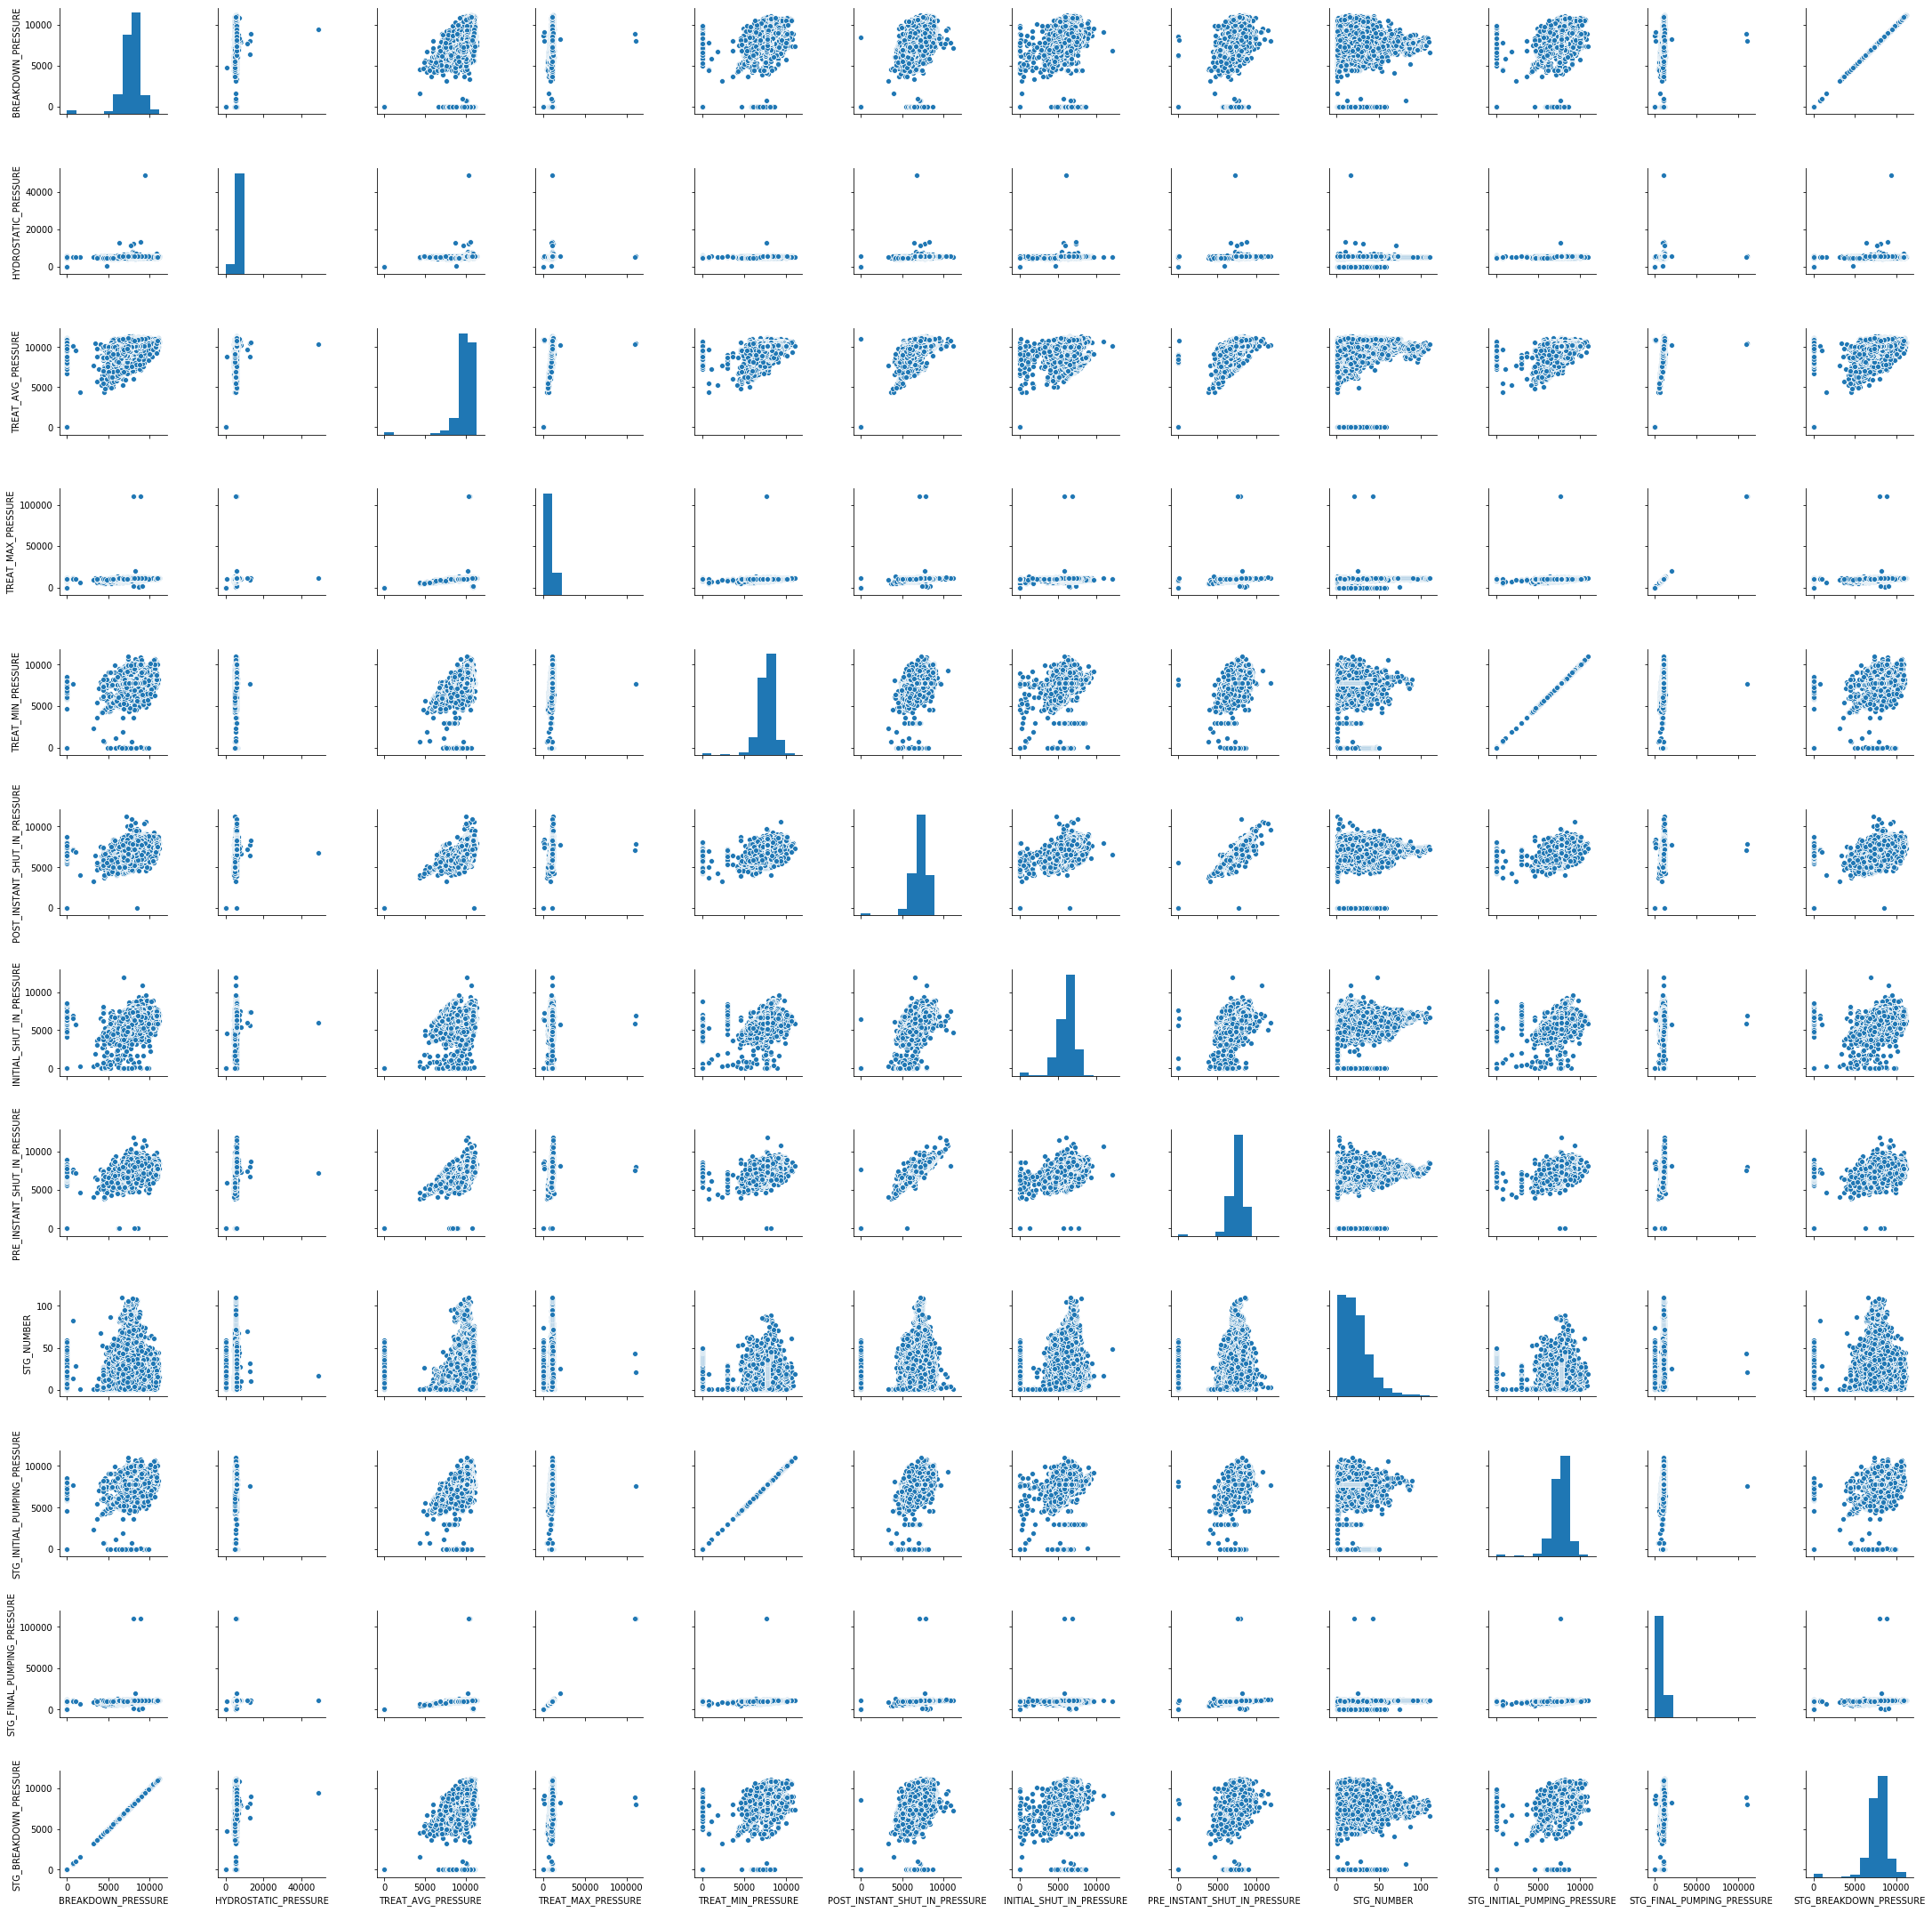

In [33]:
g = sns.pairplot(df1)

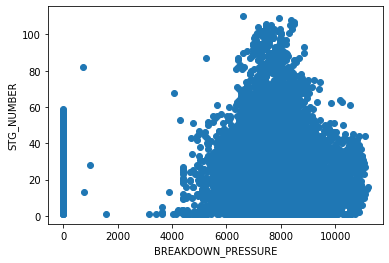

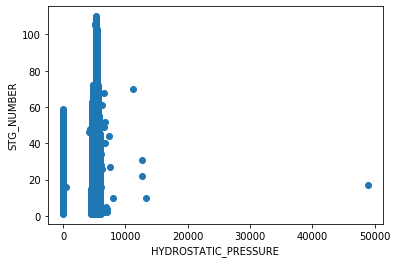

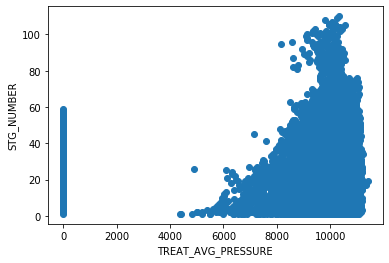

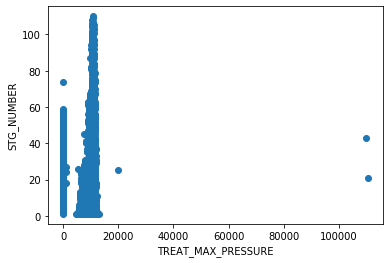

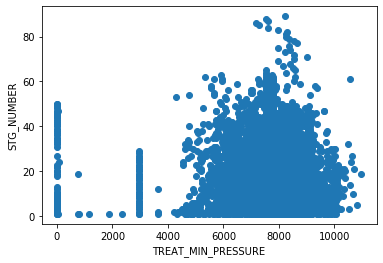

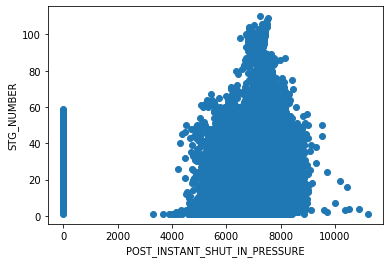

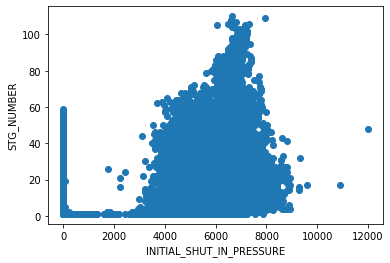

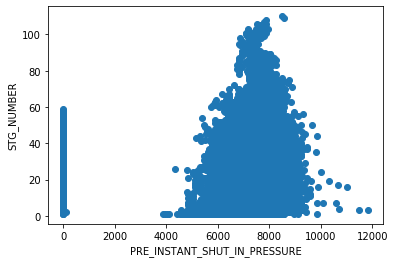

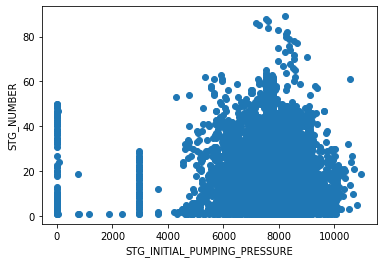

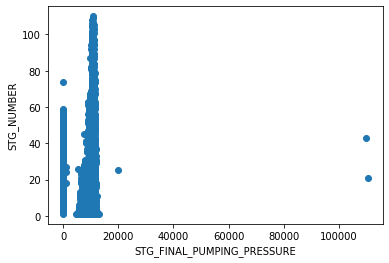

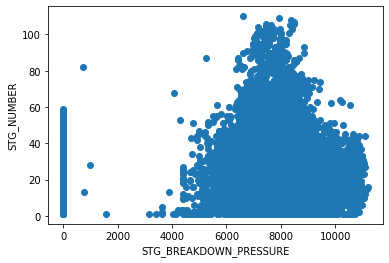

In [30]:
for feature in pressure_feature:

        data=df.copy()
    
        plt.scatter(data[feature],data['STG_NUMBER'])
        plt.xlabel(feature)
        plt.ylabel('STG_NUMBER')
        plt.show()

Discrete Features

In [34]:
discrete_feature=[feature for feature in numeric_features if len(df[feature].unique())>10 and feature not in pressure_feature+['Id'] and len(df[feature].unique())<1000 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 11


In [35]:
df[discrete_feature].describe()


UWI  PROPPANT_DESIGNED  PROPPANT_IN_WELLBORE  MAX_PUMP_RATING  \
count  1.772100e+04       1.771800e+04          1.045300e+04     14802.000000   
mean   2.019001e+09       4.214046e+05          6.705146e+03     35402.915417   
std    3.305416e+02       1.245227e+05          5.352975e+04      6067.791669   
min    2.019000e+09       0.000000e+00          0.000000e+00     10370.000000   
25%    2.019000e+09       4.200000e+05          0.000000e+00     32000.000000   
50%    2.019001e+09       4.200000e+05          0.000000e+00     34000.000000   
75%    2.019001e+09       5.200000e+05          0.000000e+00     40000.000000   
max    2.019001e+09       1.439750e+06          1.299320e+06    340000.000000   

       TREAT_AVG_RATE  TREAT_MAX_RATE  TREAT_MIN_RATE  PUMPSONLINENO  \
count    17715.000000    17716.000000    17695.000000    9766.000000   
mean        80.753373       86.566832       14.951964      17.077002   
std        171.284732      226.849020       84.706975       2.647784   
min          0.000000        0.000000        0.000000       0.000000   
25%         71.000000       76.000000       10.000000      17.000000   
50%         80.000000       85.000000       10.000000      17.000000   
75%         88.000000       90.000000       14.000000      18.000000   
max      10630.000000    11191.000000     8472.000000      22.000000   

          USERNUM1     USERNUM3      DURPUMP  
count  9738.000000  9766.000000  7592.000000  
mean     18.851715    16.328487   114.161617  
std       2.815578     2.765863    43.088367  
min       0.000000     0.000000     0.000000  
25%      18.000000    16.000000    96.000000  
50%      19.000000    17.000000   120.000000  
75%      20.000000    18.000000   134.000000  
max      26.000000    22.000000   616.000000

Discrete Features against UWI and STG_NUMBER
Not really any correlations

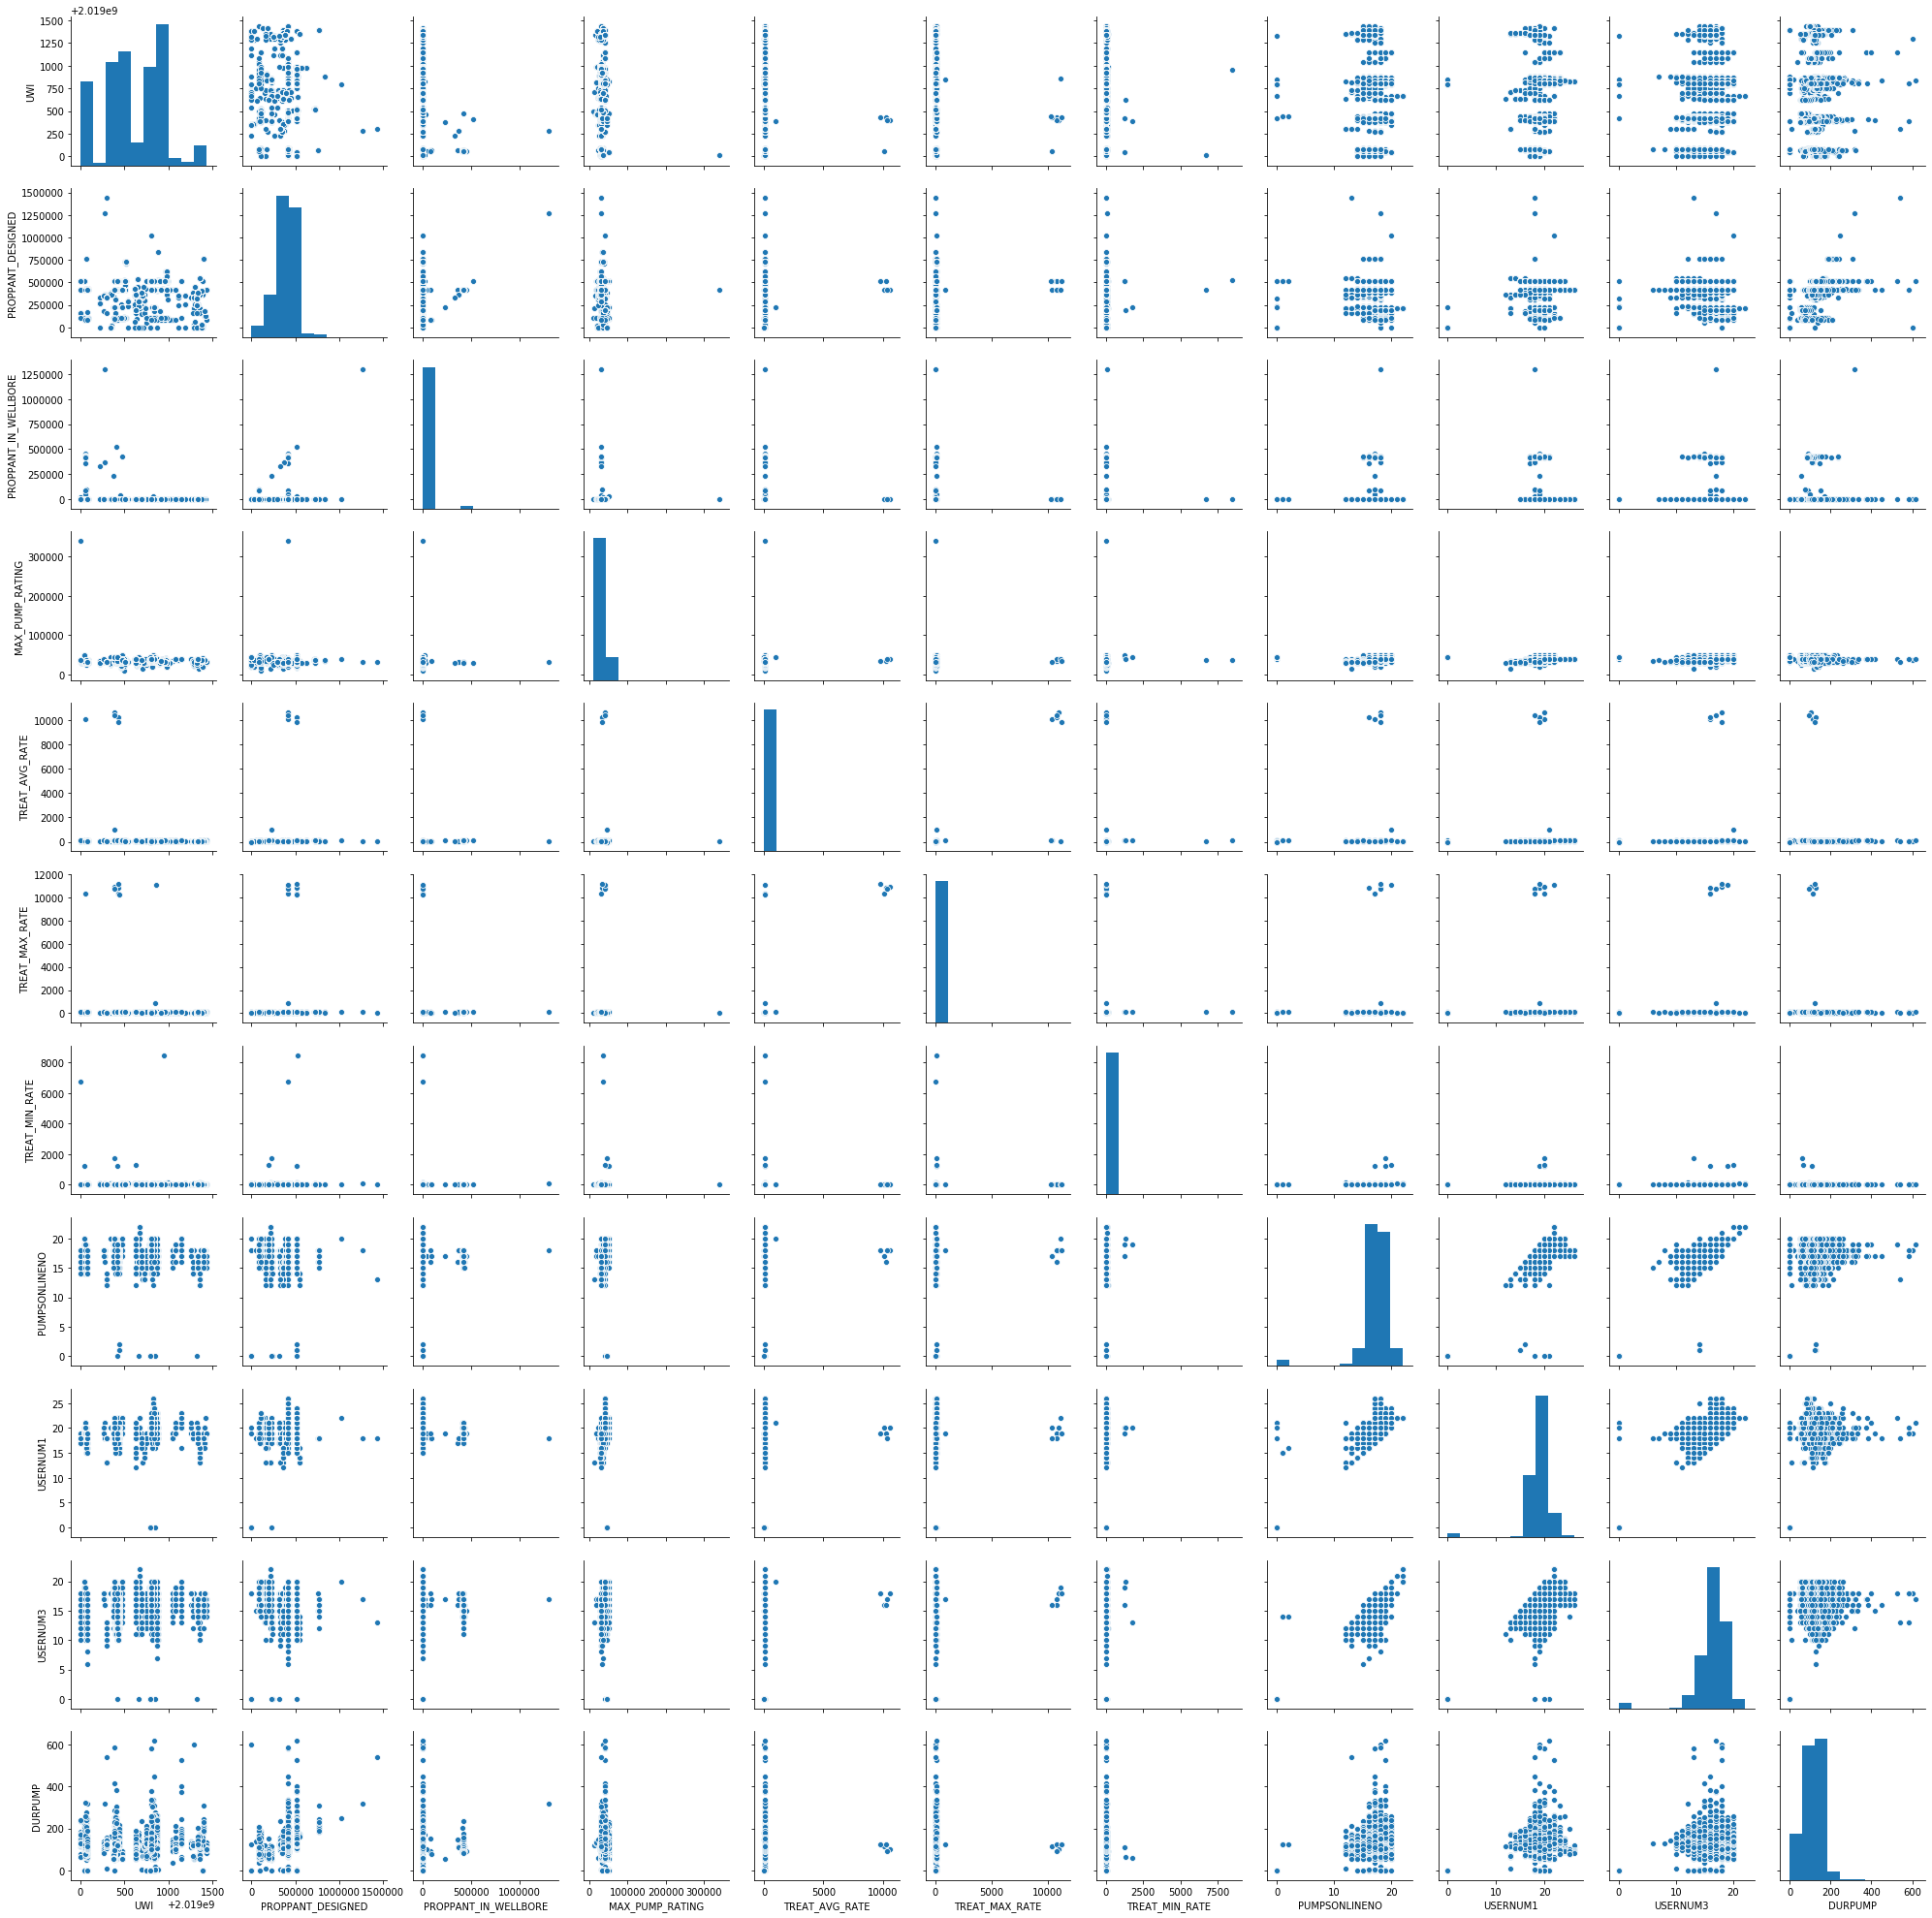

In [36]:
df1 = df[discrete_feature]
g = sns.pairplot(df1)

In [ ]:
for feature in discrete_feature:
    if feature!='UWI' and 'STG_NUMBER':
        data=df.copy()
        data.groupby(feature)['STG_NUMBER'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('STG_NUMBER')
        plt.title(feature)
        plt.show()


In [ ]:
for feature in discrete_feature:
    if feature!='UWI' and 'STG_NUMBER':
        data=df.copy()
        data.groupby(feature)['UWI'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('UWI')
        plt.title(feature)
        plt.show()

In [ ]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+pressure_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

The Depths got a nice shape

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [40]:
df2 = pd.read_excel(path + file_2)

In [41]:
df2.describe()

UWI  UWI_SIDETRACK  REPORT_START_DATE_YEAR  FRAC_GRADIENT  \
count  1.654000e+03    1654.000000             1654.000000    1261.000000   
mean   2.019001e+09       0.030834             2018.119105       0.998414   
std    3.710343e+02       0.172921                0.796824       0.039809   
min    2.019000e+09       0.000000             2017.000000       0.000000   
25%    2.019001e+09       0.000000             2017.000000       1.000000   
50%    2.019001e+09       0.000000             2018.000000       1.000000   
75%    2.019001e+09       0.000000             2019.000000       1.000000   
max    2.019001e+09       1.000000             2019.000000       1.000000   

       BREAKDOWN_PRESSURE  HYDROSTATIC_PRESSURE  TREAT_AVG_PRESSURE  \
count         1351.000000           1611.000000         1652.000000   
mean          6695.372317           5434.203600         8534.148910   
std           1846.034959            324.889597          998.290004   
min              0.000000            498.000000         4391.000000   
25%           6167.500000           5287.000000         7957.000000   
50%           6944.000000           5483.000000         8615.500000   
75%           7698.500000           5594.000000         9278.750000   
max          10300.000000          12713.000000        10450.000000   

       TREAT_MAX_PRESSURE  TREAT_MIN_PRESSURE  PROPPANT_DESIGNED  ...  \
count         1652.000000          908.000000       1.653000e+03  ...   
mean          8982.685835         6911.194934       3.127661e+05  ...   
std            986.262340         1467.860076       1.282900e+05  ...   
min           4570.000000            0.000000       0.000000e+00  ...   
25%           8462.000000         6462.750000       2.406250e+05  ...   
50%           9113.000000         7346.000000       3.500000e+05  ...   
75%           9684.500000         7659.000000       3.815000e+05  ...   
max          10729.000000         9170.000000       1.439750e+06  ...   

       STG_CLEAN_VOLUME_PUMPED  STG_SLURRY_VOLUME_PUMPED  \
count              1654.000000               1654.000000   
mean               7356.957074               7698.151149   
std                3310.723033               3368.878292   
min                   0.000000                  0.000000   
25%                6097.750000               6335.000000   
50%                7153.500000               7543.500000   
75%                7906.750000               8326.500000   
max               45000.000000              45539.000000   

       STG_VOLUME_RECOVERED  PUMPSONLINENO    USERNUM1    USERNUM3  \
count                1068.0     768.000000  740.000000  768.000000   
mean                    0.0      16.511719   18.158108   15.869792   
std                     0.0       2.167044    1.698722    2.333638   
min                     0.0       0.000000   12.000000    0.000000   
25%                     0.0      15.000000   18.000000   14.000000   
50%                     0.0      17.000000   18.000000   16.000000   
75%                     0.0      18.000000   19.000000   18.000000   
max                     0.0      22.000000   22.000000   22.000000   

          DURPUMP  TOP_DEPTH_TVD  BOTTOM_DEPTH_TVD     PROPOSED  
count  513.000000    1634.000000       1654.000000  1499.000000  
mean   112.623782   12505.935129      12505.276904     0.006671  
std     49.387150     555.222512        564.089855     0.081431  
min      0.000000   11094.000000      11123.000000     0.000000  
25%     89.000000   12242.000000      12130.000000     0.000000  
50%    117.000000   12580.000000      12696.500000     0.000000  
75%    132.000000   12874.500000      12892.000000     0.000000  
max    599.000000   13626.000000      13685.000000     1.000000  

[8 rows x 39 columns]

In [ ]:
df2.shape

In [42]:
numeric_features = df2.select_dtypes(include=[np.number])
numeric_features.columns

Index(['UWI', 'UWI_SIDETRACK', 'REPORT_START_DATE_YEAR', 'FRAC_GRADIENT',
       'BREAKDOWN_PRESSURE', 'HYDROSTATIC_PRESSURE', 'TREAT_AVG_PRESSURE',
       'TREAT_MAX_PRESSURE', 'TREAT_MIN_PRESSURE', 'PROPPANT_DESIGNED',
       'PROPPANT_IN_FORMATION', 'PROPPANT_IN_WELLBORE', 'AVG_HYDRAULIC_POWER',
       'MAX_PUMP_POWER', 'MAX_PUMP_RATING', 'TREAT_AVG_RATE', 'TREAT_MAX_RATE',
       'TREAT_MIN_RATE', 'POST_INSTANT_SHUT_IN_PRESSURE',
       'INITIAL_SHUT_IN_PRESSURE', 'PRE_INSTANT_SHUT_IN_PRESSURE',
       'STG_NUMBER', 'STG_TOP_DEPTH', 'STG_BOTTOM_DEPTH',
       'STG_ELEMENT_TOP_DEPTH', 'STG_ELEMENT_BOTTOM_DEPTH',
       'STG_INITIAL_PUMPING_PRESSURE', 'STG_FINAL_PUMPING_PRESSURE',
       'STG_BREAKDOWN_PRESSURE', 'STG_CLEAN_VOLUME_PUMPED',
       'STG_SLURRY_VOLUME_PUMPED', 'STG_VOLUME_RECOVERED', 'PUMPSONLINENO',
       'USERNUM1', 'USERNUM3', 'DURPUMP', 'TOP_DEPTH_TVD', 'BOTTOM_DEPTH_TVD',
       'PROPOSED'],
      dtype='object')

In [ ]:
numeric_features.head()


In [43]:
pressure_feature = [feature for feature in numeric_features if 'PRESSURE' in feature or 'STG_CLEAN_VOLUME_PUMPED' in feature or 'STG_NUMBER' in feature]

pressure_feature

['BREAKDOWN_PRESSURE',
 'HYDROSTATIC_PRESSURE',
 'TREAT_AVG_PRESSURE',
 'TREAT_MAX_PRESSURE',
 'TREAT_MIN_PRESSURE',
 'POST_INSTANT_SHUT_IN_PRESSURE',
 'INITIAL_SHUT_IN_PRESSURE',
 'PRE_INSTANT_SHUT_IN_PRESSURE',
 'STG_NUMBER',
 'STG_INITIAL_PUMPING_PRESSURE',
 'STG_FINAL_PUMPING_PRESSURE',
 'STG_BREAKDOWN_PRESSURE',
 'STG_CLEAN_VOLUME_PUMPED']

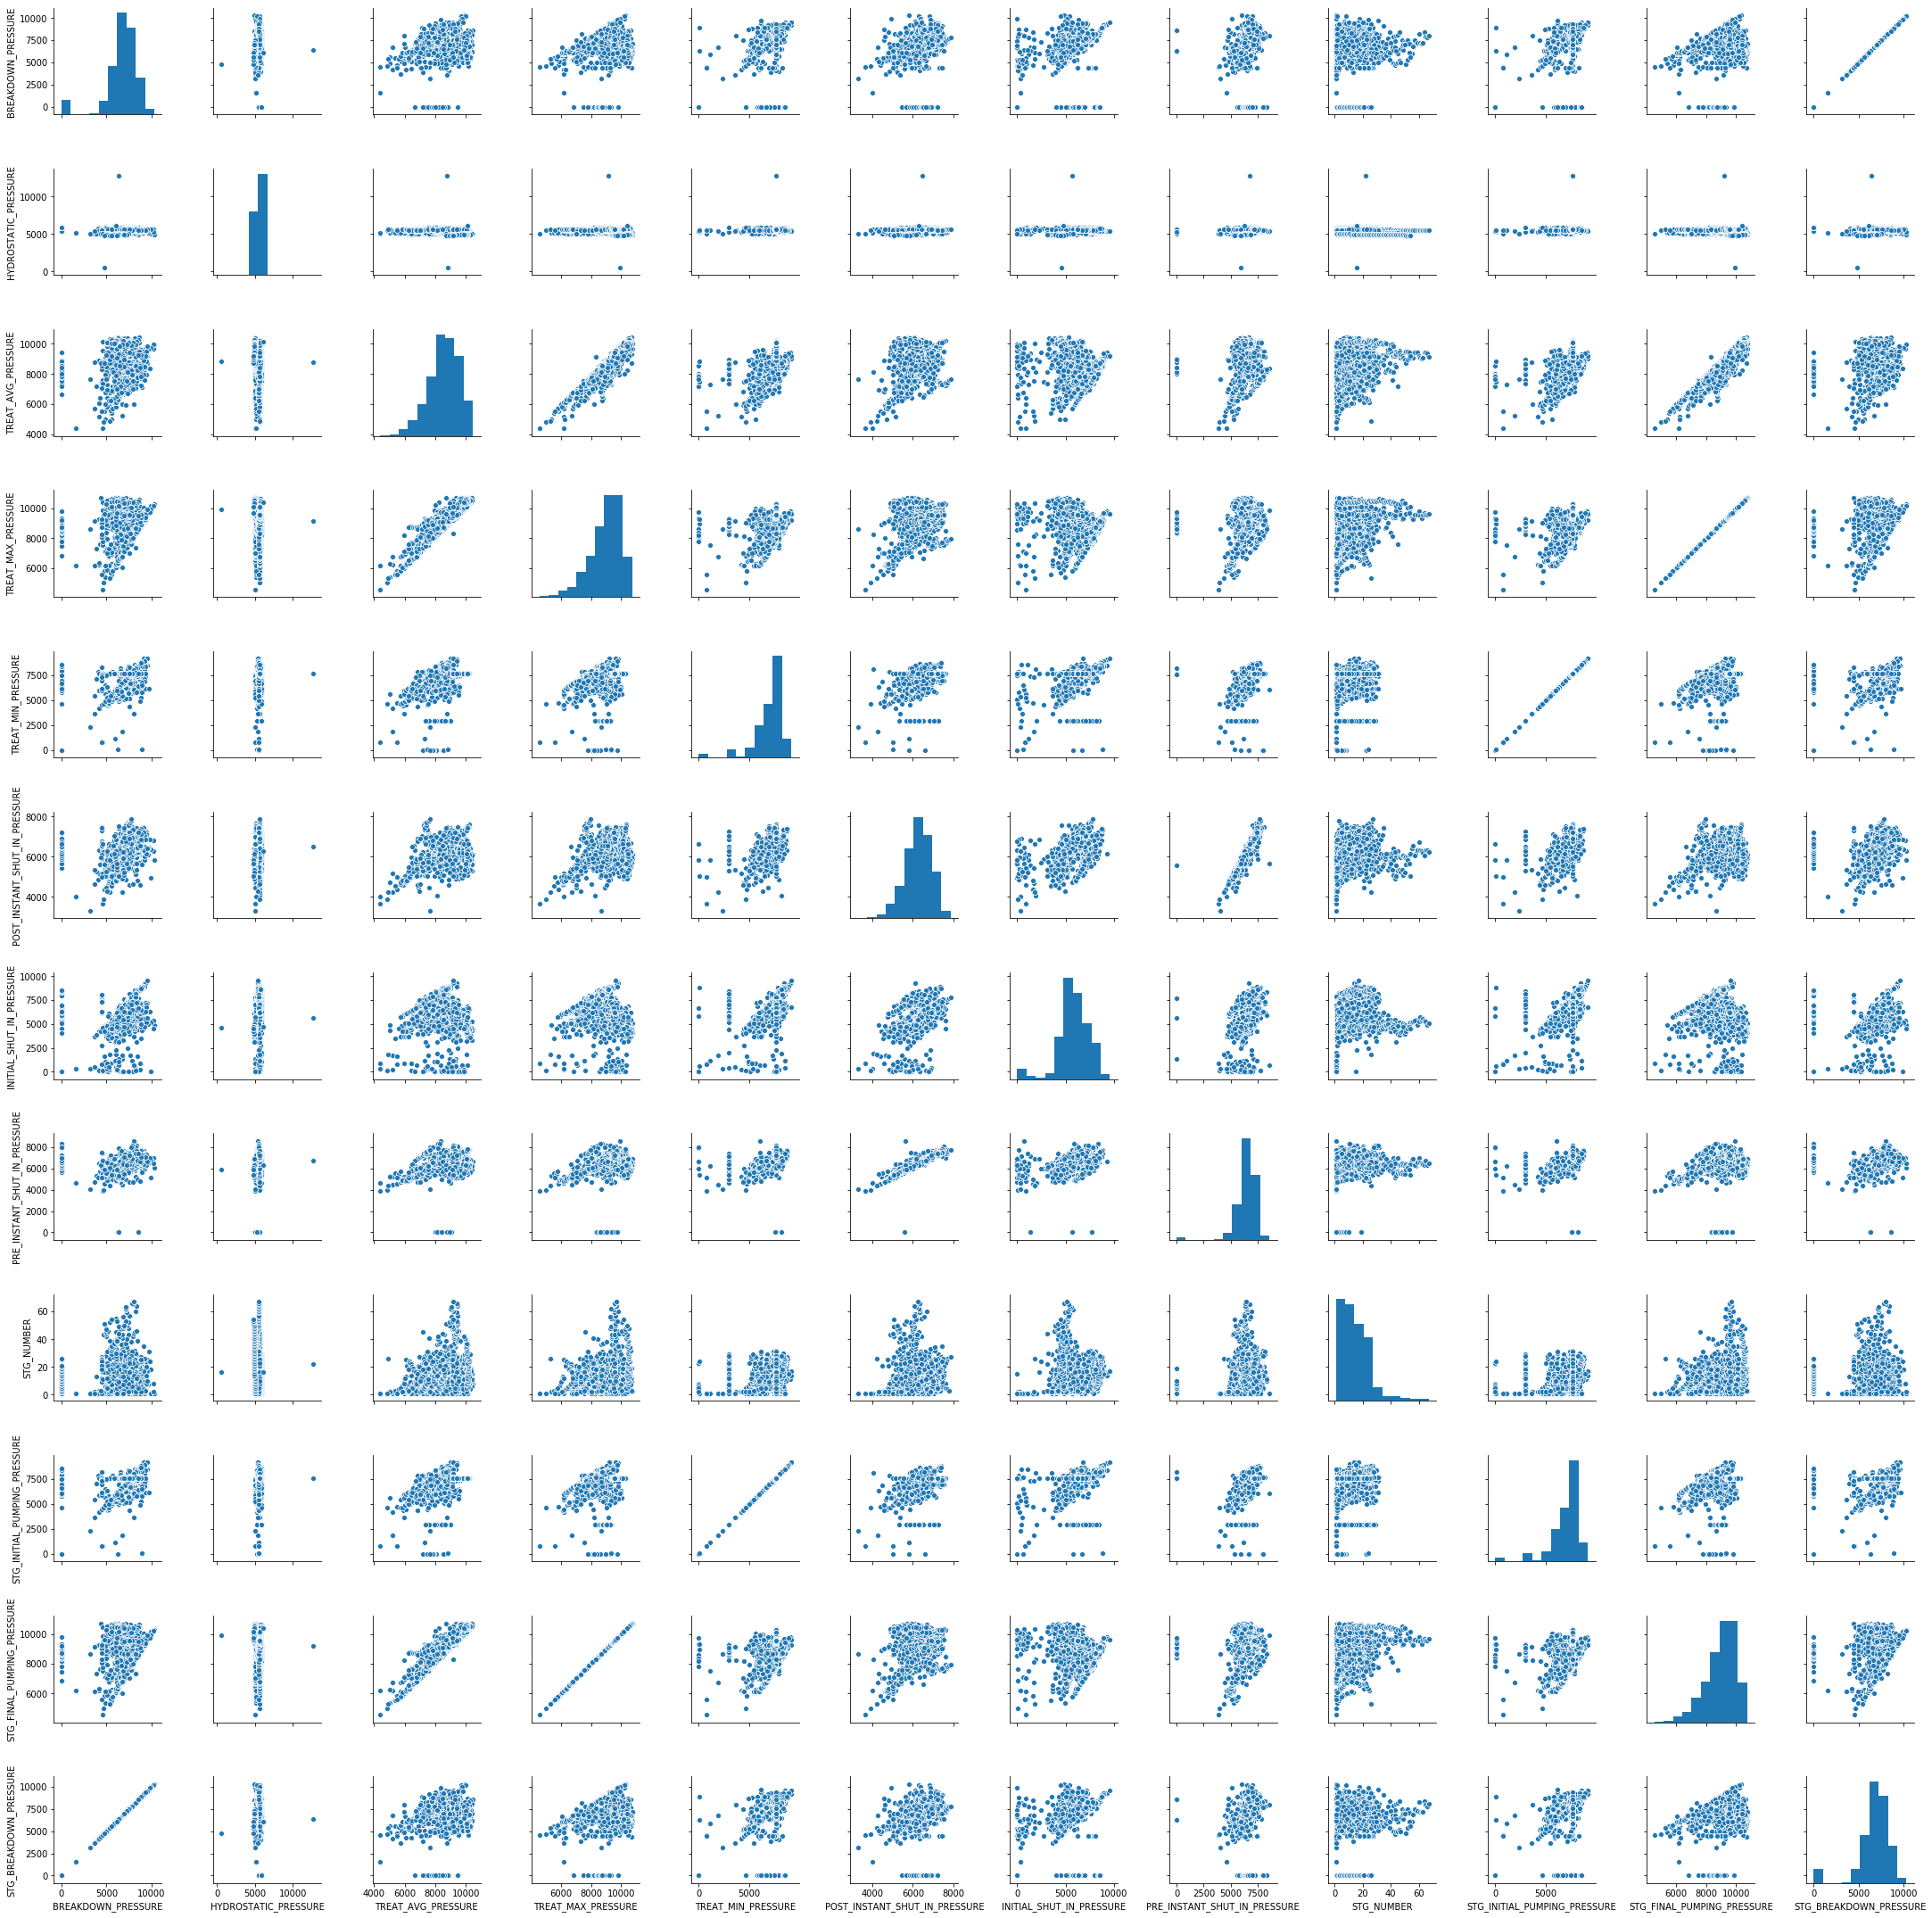

In [49]:
df1 = df2[pressure_feature]
g = sns.pairplot(df1)

Not as nice as before, looked at the correlations for STG_CLEAN_VOLUME_PUMPED to see if any, just a lot of clumps. The STG_NUMBER is crappier and the UWI wasn't even worth keeping

In [ ]:
for feature in pressure_feature:

        data=df2.copy()
    
        plt.scatter(data['STG_CLEAN_VOLUME_PUMPED'],data[feature])
        plt.xlabel('STG_CLEAN_VOLUME_PUMPED')
        plt.ylabel(feature)
        plt.show()

In [ ]:
for feature in pressure_feature:

        data=df2.copy()
    
        plt.scatter(data[feature],data['STG_NUMBER'])
        plt.xlabel(feature)
        plt.ylabel('STG_NUMBER')
        plt.show()

In [ ]:
discrete_feature=[feature for feature in numeric_features if len(df2[feature].unique())>10 and feature not in pressure_feature+['Id'] and len(df2[feature].unique())<1000 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
df2[discrete_feature].describe()


Void the discrete features, not too much to look at

In [ ]:
for feature in discrete_feature:
    if feature!='UWI' and 'STG_NUMBER':
        data=df2.copy()
        data.groupby(feature)['STG_NUMBER'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('STG_NUMBER')
        plt.title(feature)
        plt.show()

In [ ]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+pressure_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

Continious features are crap 

In [ ]:
for feature in continuous_feature:
    data2=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [45]:
df3 = pd.read_excel(path + file_3)

In [ ]:
df3.describe()

In [ ]:
df3.shape

In [46]:
numeric_features = df3.select_dtypes(include=[np.number])
numeric_features.columns

Index(['UWI', 'UWI_SIDETRACK', 'REPORT_START_DATE_YEAR', 'FRAC_GRADIENT',
       'BREAKDOWN_PRESSURE', 'HYDROSTATIC_PRESSURE', 'TREAT_AVG_PRESSURE',
       'TREAT_MAX_PRESSURE', 'TREAT_MIN_PRESSURE', 'PROPPANT_DESIGNED',
       'PROPPANT_IN_FORMATION', 'PROPPANT_IN_WELLBORE', 'AVG_HYDRAULIC_POWER',
       'MAX_PUMP_POWER', 'MAX_PUMP_RATING', 'TREAT_AVG_RATE', 'TREAT_MAX_RATE',
       'TREAT_MIN_RATE', 'POST_INSTANT_SHUT_IN_PRESSURE',
       'INITIAL_SHUT_IN_PRESSURE', 'PRE_INSTANT_SHUT_IN_PRESSURE',
       'STG_NUMBER', 'STG_TOP_DEPTH', 'STG_BOTTOM_DEPTH',
       'STG_ELEMENT_TOP_DEPTH', 'STG_ELEMENT_BOTTOM_DEPTH',
       'STG_INITIAL_PUMPING_PRESSURE', 'STG_FINAL_PUMPING_PRESSURE',
       'STG_BREAKDOWN_PRESSURE', 'STG_CLEAN_VOLUME_PUMPED',
       'STG_SLURRY_VOLUME_PUMPED', 'STG_VOLUME_RECOVERED', 'PUMPSONLINENO',
       'USERNUM1', 'USERNUM3', 'DURPUMP', 'TOP_DEPTH_TVD', 'BOTTOM_DEPTH_TVD',
       'PROPOSED'],
      dtype='object')

In [ ]:
numeric_features.head()


In [47]:
pressure_feature = [feature for feature in numeric_features if 'PRESSURE' in feature or 'STG_NUMBER' in feature ]

pressure_feature

['BREAKDOWN_PRESSURE',
 'HYDROSTATIC_PRESSURE',
 'TREAT_AVG_PRESSURE',
 'TREAT_MAX_PRESSURE',
 'TREAT_MIN_PRESSURE',
 'POST_INSTANT_SHUT_IN_PRESSURE',
 'INITIAL_SHUT_IN_PRESSURE',
 'PRE_INSTANT_SHUT_IN_PRESSURE',
 'STG_NUMBER',
 'STG_INITIAL_PUMPING_PRESSURE',
 'STG_FINAL_PUMPING_PRESSURE',
 'STG_BREAKDOWN_PRESSURE']

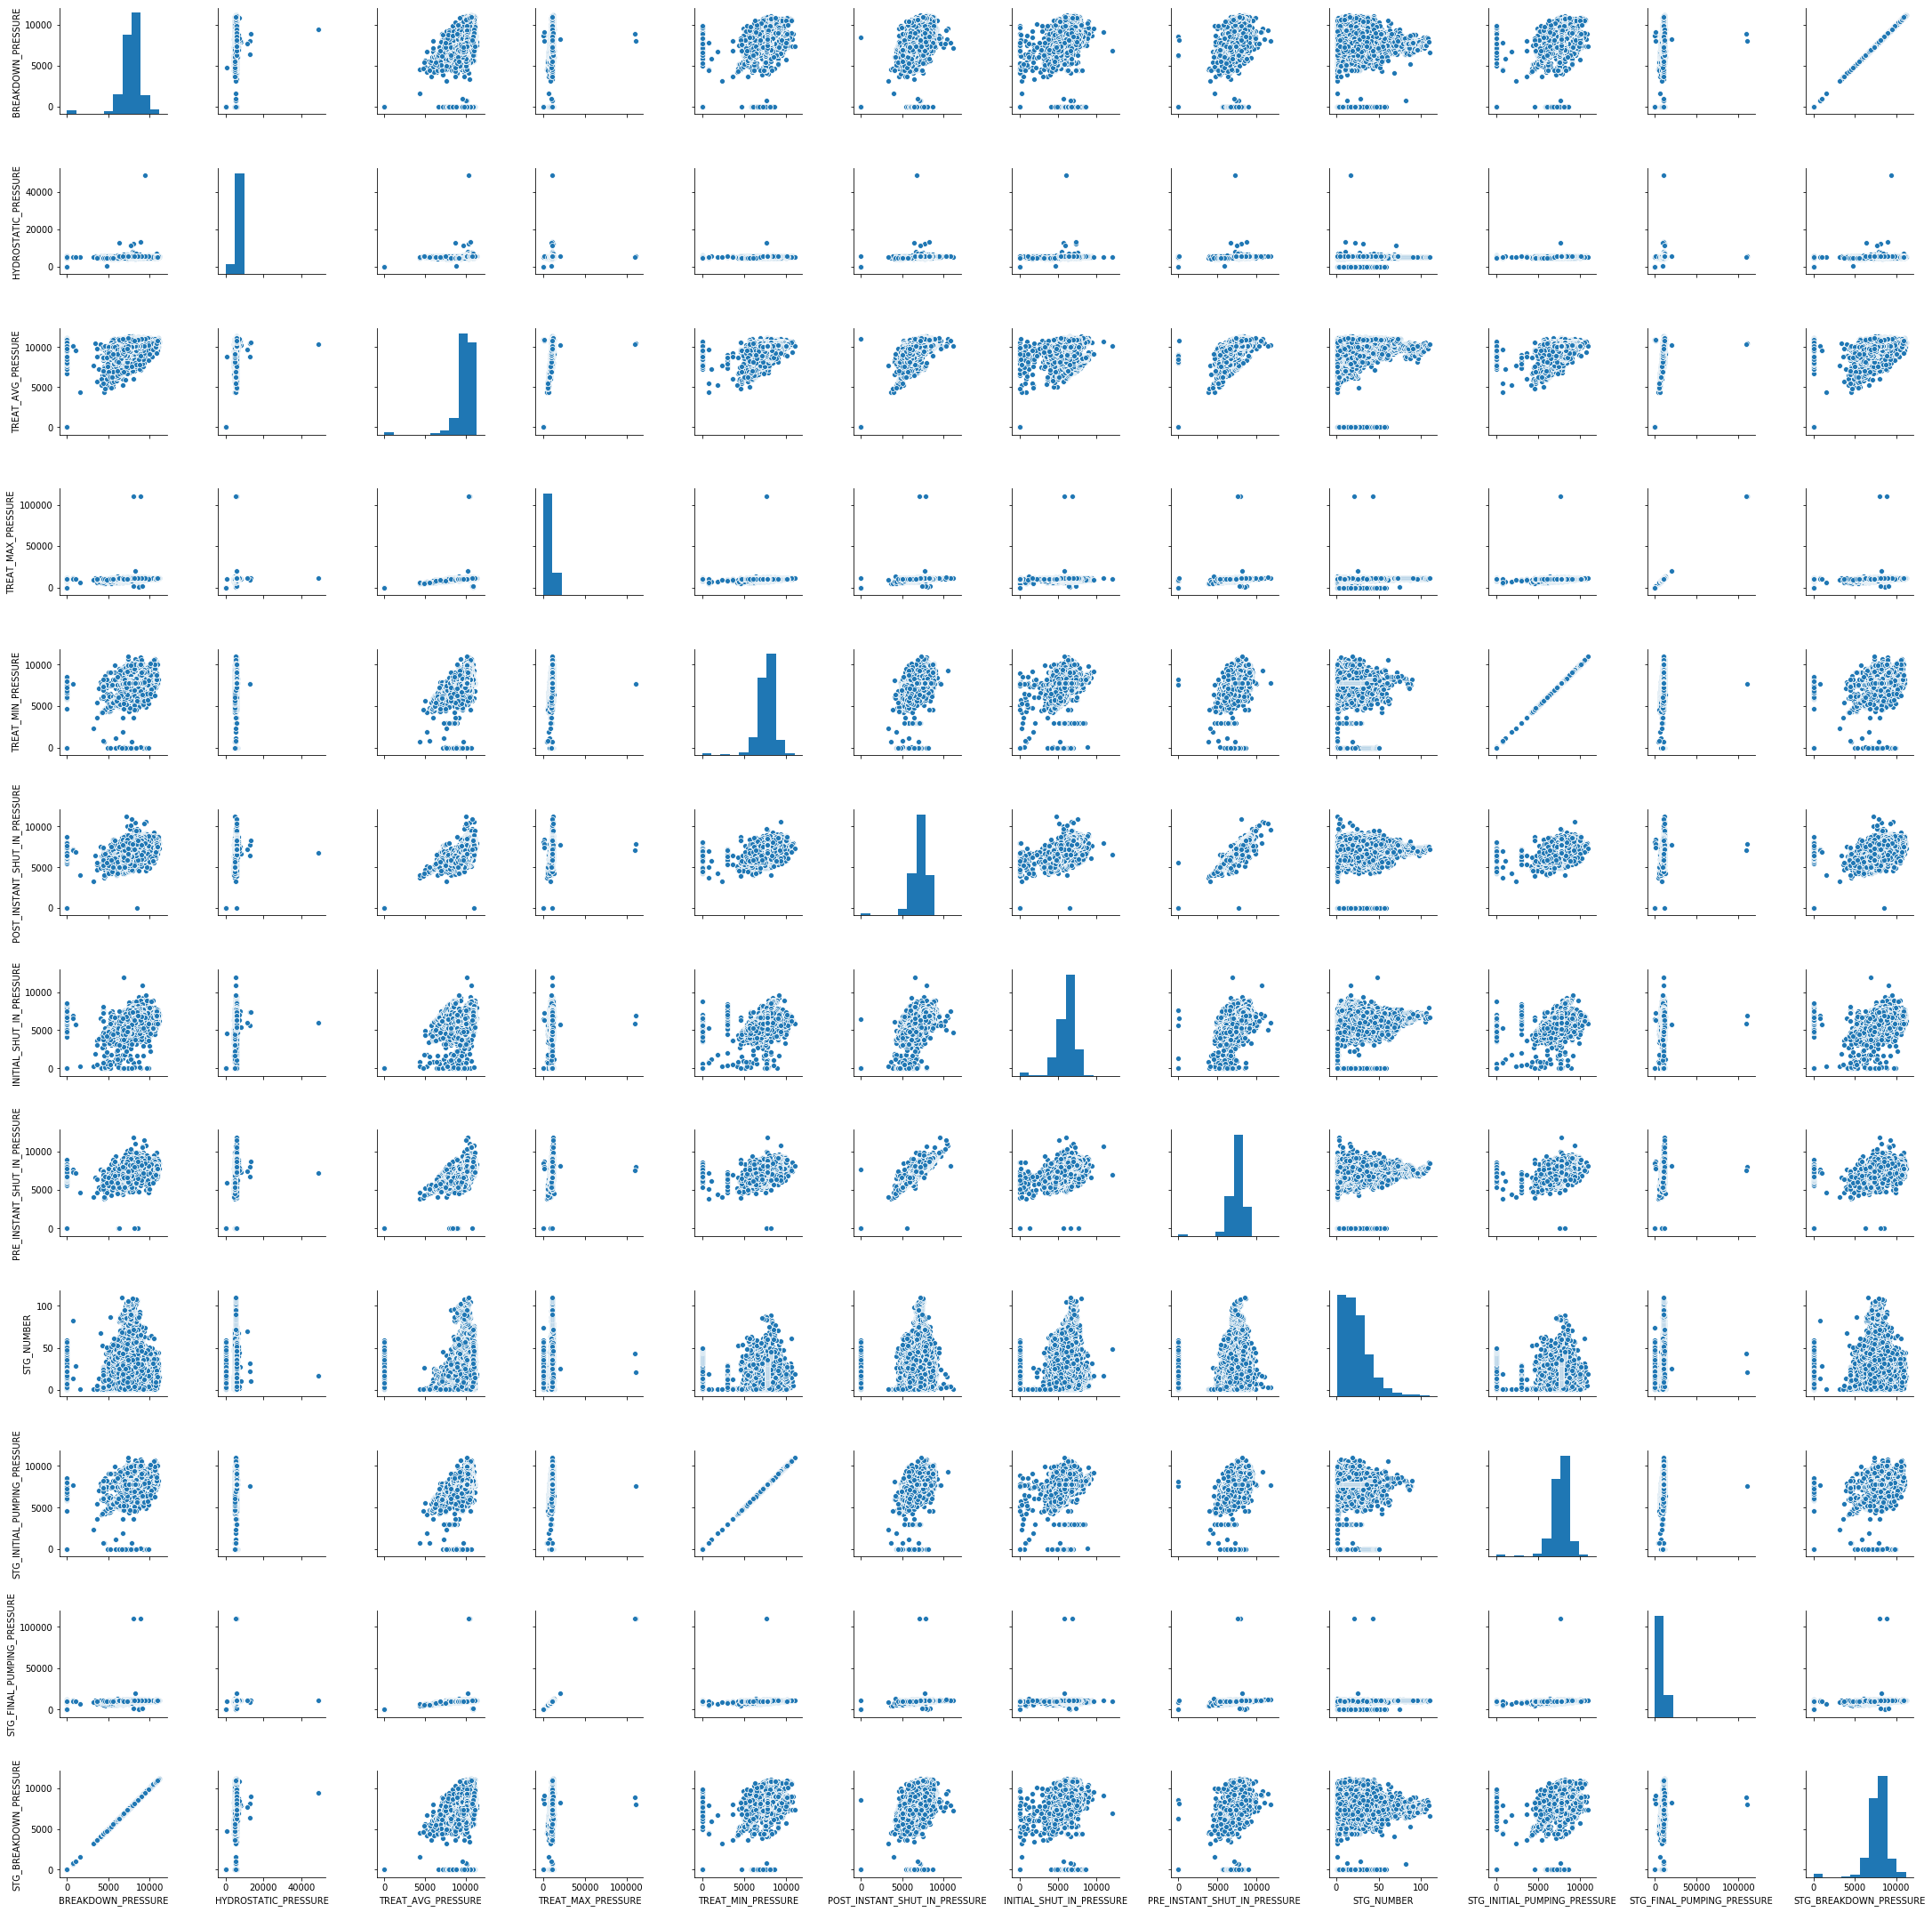

In [50]:
df1 = df3[pressure_feature]
g = sns.pairplot(df1)

Pressure features. The stage number looks pretty good, some shapes happening.

In [ ]:
for feature in pressure_feature:

        data=df3.copy()
    
        plt.scatter(data[feature],data['UWI'])
        plt.xlabel(feature)
        plt.ylabel('UWI')
        plt.show()

In [ ]:
for feature in pressure_feature:

        data=df3.copy()
    
        plt.scatter(data[feature],data['STG_NUMBER'])
        plt.xlabel(feature)
        plt.ylabel('STG_NUMBER')
        plt.show()

In [ ]:
discrete_feature=[feature for feature in numeric_features if len(df3[feature].unique())>10 and feature not in pressure_feature+['Id'] and len(df3[feature].unique())<1000 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
df3[discrete_feature].describe()


Void the discrete stuff again

In [ ]:
for feature in discrete_feature:
    if feature!='UWI' and 'STG_NUMBER':
        data=df3.copy()
        data.groupby(feature)['STG_NUMBER'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('STG_NUMBER')
        plt.title(feature)
        plt.show()

In [ ]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+pressure_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

Nothing important looking at the continious features

In [ ]:
for feature in continuous_feature:
    data=df3.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [51]:
df4 = pd.read_excel(path + file_4)

In [ ]:
df4.describe()

In [ ]:
df4.shape

In [52]:
numeric_features = df4.select_dtypes(include=[np.number])
numeric_features.columns

Index(['UWI', 'CYCLE_YEAR', 'CYCLE_MONTH', 'LEASE_OIL_PROD_VOL',
       'LEASE_GAS_PROD_VOL', 'LEASE_GAS_LIFT_INJ_VOL', 'LEASE_COND_PROD_VOL'],
      dtype='object')

In [ ]:
numeric_features.head()


In [53]:
lease_feature = [feature for feature in numeric_features if 'LEASE' in feature  ]

lease_feature

['LEASE_OIL_PROD_VOL',
 'LEASE_GAS_PROD_VOL',
 'LEASE_GAS_LIFT_INJ_VOL',
 'LEASE_COND_PROD_VOL']

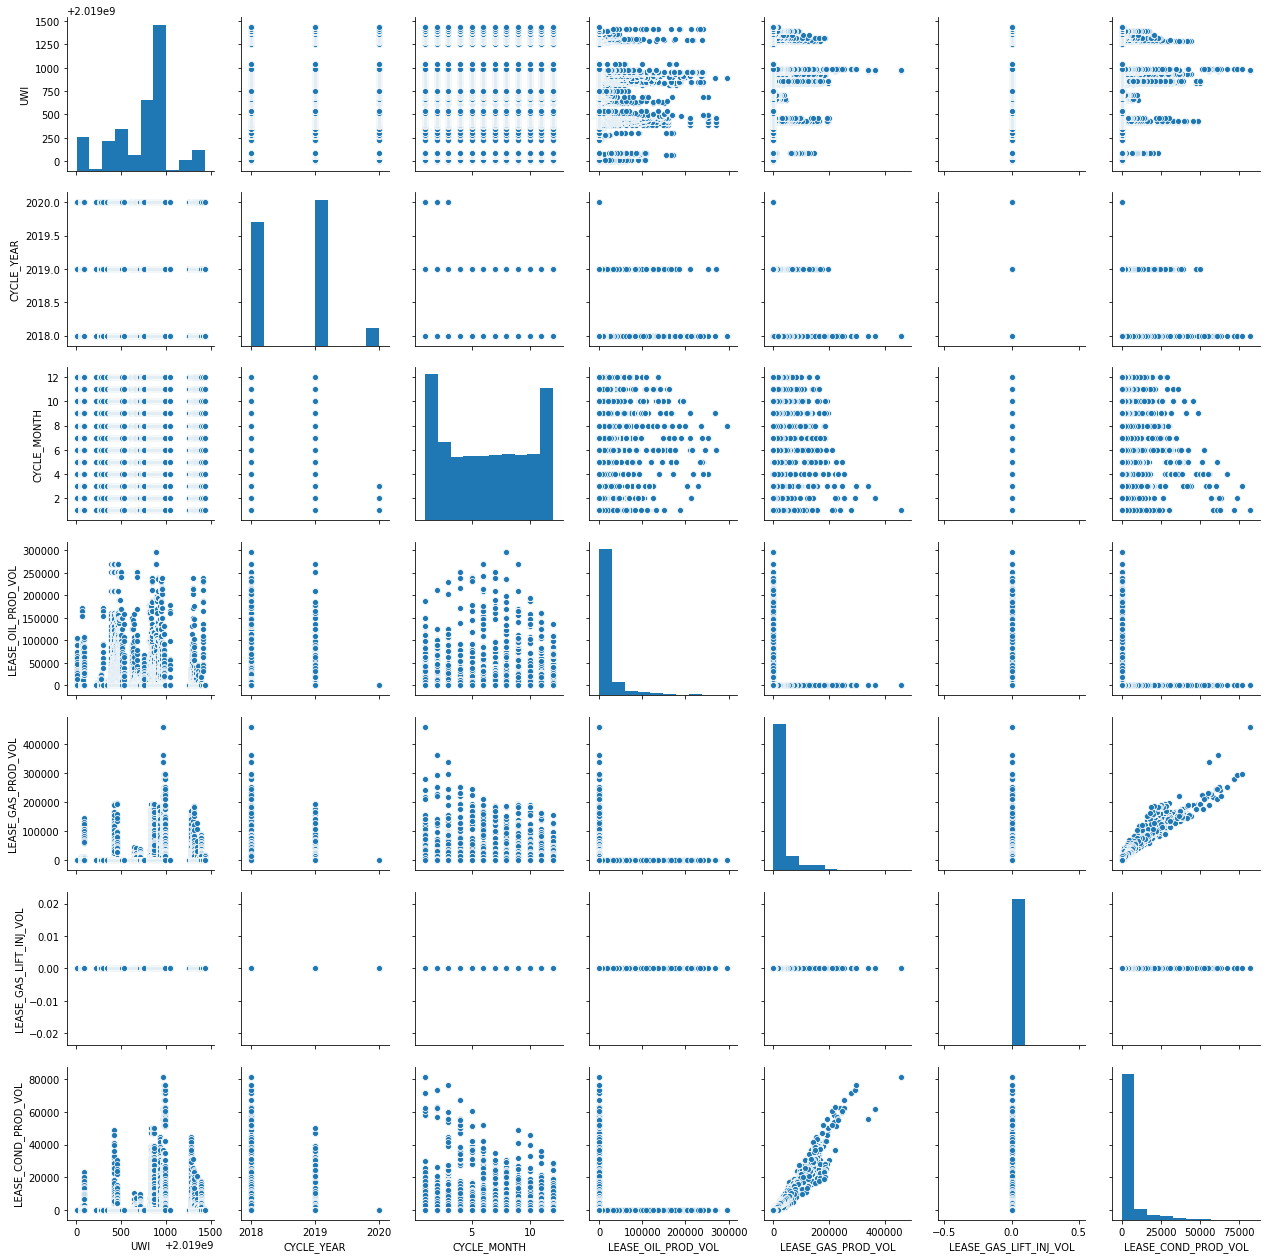

In [56]:
g = sns.pairplot(numeric_features)

Something is happening in the lease features. Not really nice tho

In [ ]:
for feature in lease_feature:

        data=df4.copy()
    
        plt.scatter(data[feature],data['UWI'])
        plt.xlabel(feature)
        plt.ylabel('UWI')
        plt.show()

In [ ]:
discrete_feature=[feature for feature in numeric_features if len(df4[feature].unique())>10 and feature not in lease_feature+['Id'] and len(df4[feature].unique())<1000 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
df4[discrete_feature].describe()


In [ ]:
for feature in discrete_feature:
    if feature!='UWI' :
        data=df4.copy()
        data.groupby(feature)['UWI'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('UWI')
        plt.title(feature)
        plt.show()

In [ ]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+lease_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

In [ ]:
for feature in continuous_feature:
    data=df4.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [57]:
df5 = pd.read_excel(path + file_5)

In [58]:
df5.describe()

UWI  UWI_SIDETRACK  DAILY_OPS_START_DATE_YEAR  \
count  2.742000e+03    2742.000000                2742.000000   
mean   2.019110e+09       0.190372                2018.297593   
std    2.100654e+01       0.502684                   0.750815   
min    2.019110e+09       0.000000                2017.000000   
25%    2.019110e+09       0.000000                2018.000000   
50%    2.019110e+09       0.000000                2018.000000   
75%    2.019110e+09       0.000000                2019.000000   
max    2.019110e+09       3.000000                2019.000000   

       STIM_INT_FRAC_GRADIENT  BREAKDOWN_PRESS  STIM_INT_HYDROSTATIC_PRESS  \
count             2690.000000      2725.000000                 2061.000000   
mean                 1.026766      5522.426422                 4032.087821   
std                  1.506163      2309.334426                 1025.598441   
min                  0.000000         0.000000                    0.000000   
25%                  1.000000      4296.000000                 4062.000000   
50%                  1.000000      4993.000000                 4161.000000   
75%                  1.000000      6301.000000                 4252.000000   
max                 79.000000     71111.000000                41089.000000   

       STIM_INT_TREAT_AVG_PRESS  STIM_INT_TREAT_MAX_PRESS  \
count               2732.000000               2732.000000   
mean                8201.148609               8979.787701   
std                 1576.828078               1563.381344   
min                    0.000000                  0.000000   
25%                 7236.500000               8095.500000   
50%                 8348.000000               9186.000000   
75%                 9484.000000              10210.750000   
max                10995.000000              19557.000000   

       STIM_INT_TREAT_MIN_PRESS  STIM_INT_PROPPANT_DESIGNED  ...  \
count               1274.000000                 2735.000000  ...   
mean                4440.056515               472651.136380  ...   
std                 1169.125626               164456.661902  ...   
min                    0.000000                    0.000000  ...   
25%                 3863.250000               440000.000000  ...   
50%                 4364.000000               550000.000000  ...   
75%                 4942.000000               550250.000000  ...   
max                 9240.000000               660260.000000  ...   

       STIM_INT_BREAKDOWN_PRESS  STIM_INT_AVG_RATE  \
count               2725.000000        2733.000000   
mean                5522.426422          95.046103   
std                 2309.334426         267.689690   
min                    0.000000           0.000000   
25%                 4296.000000          80.000000   
50%                 4993.000000          86.000000   
75%                 6301.000000          91.000000   
max                71111.000000        9288.000000   

       STIM_INT_CLEAN_VOLUME_PUMPED  STIM_INT_SLURRY_VOLUME_PUMPED  \
count                   2742.000000                    2742.000000   
mean                    9670.384026                   10158.475565   
std                     3730.760539                    3061.476701   
min                        0.000000                       0.000000   
25%                     8448.500000                    8918.500000   
50%                    10612.500000                   11219.500000   
75%                    11105.250000                   11737.000000   
max                   108445.000000                   54658.000000   

       STIM_INT_VOLUME_RECOVERED  STIM_INT_BOTTOM_DEPTH_TVD  \
count                2742.000000                2730.000000   
mean                    3.982495                9073.157875   
std                   208.539781                1448.071539   
min                     0.000000                4715.000000   
25%                     0.000000                9330.000000   
50%                     0.000000                9607.000000   
75%  

In [ ]:
df5.shape

In [59]:
numeric_features = df5.select_dtypes(include=[np.number])
numeric_features.columns

Index(['UWI', 'UWI_SIDETRACK', 'DAILY_OPS_START_DATE_YEAR',
       'STIM_INT_FRAC_GRADIENT', 'BREAKDOWN_PRESS',
       'STIM_INT_HYDROSTATIC_PRESS', 'STIM_INT_TREAT_AVG_PRESS',
       'STIM_INT_TREAT_MAX_PRESS', 'STIM_INT_TREAT_MIN_PRESS',
       'STIM_INT_PROPPANT_DESIGNED', 'STIM_INT_PROPPANT_TOTAL',
       'STIM_INT_PROPPANT_IN_WELLBORE', 'STIM_INT_AVG_HYDRAULIC_POWER',
       'STIM_INT_MAX_PUMP_POWER', 'STIM_INT_MAX_PUMP_RATING',
       'STIM_INT_TREAT_AVG_RATE', 'STIM_INT_TREAT_MAX_RATE',
       'STIM_INT_TREAT_MIN_RATE', 'STIM_INT_POST_INST_SHUT_IN_PRESS',
       'STIM_INT_INITIAL_SHUT_IN_PRESS', 'STIM_INT_STAGE_NUMBER',
       'STIM_INT_TOP_DEPTH', 'STIM_INT_BTM_DEPTH', 'ELEMENT_TOP_DEPTH',
       'ELEMENT_BOTTOM_DEPTH', 'STIM_INT_BREAKDOWN_PRESS', 'STIM_INT_AVG_RATE',
       'STIM_INT_CLEAN_VOLUME_PUMPED', 'STIM_INT_SLURRY_VOLUME_PUMPED',
       'STIM_INT_VOLUME_RECOVERED', 'STIM_INT_BOTTOM_DEPTH_TVD',
       'STIM_INT_TOP_DEPTH_TVD', 'TOTAL_PUMPS_ON_LOCATION',
       'PUMPS_ON

In [ ]:
numeric_features.head()


In [61]:
avg_feature = [feature for feature in numeric_features if 'AVG' in feature or 'UWI' in feature ]

avg_feature

['UWI',
 'UWI_SIDETRACK',
 'STIM_INT_TREAT_AVG_PRESS',
 'STIM_INT_AVG_HYDRAULIC_POWER',
 'STIM_INT_TREAT_AVG_RATE',
 'STIM_INT_AVG_RATE']

Need to compare the rest of them besides the averages. 

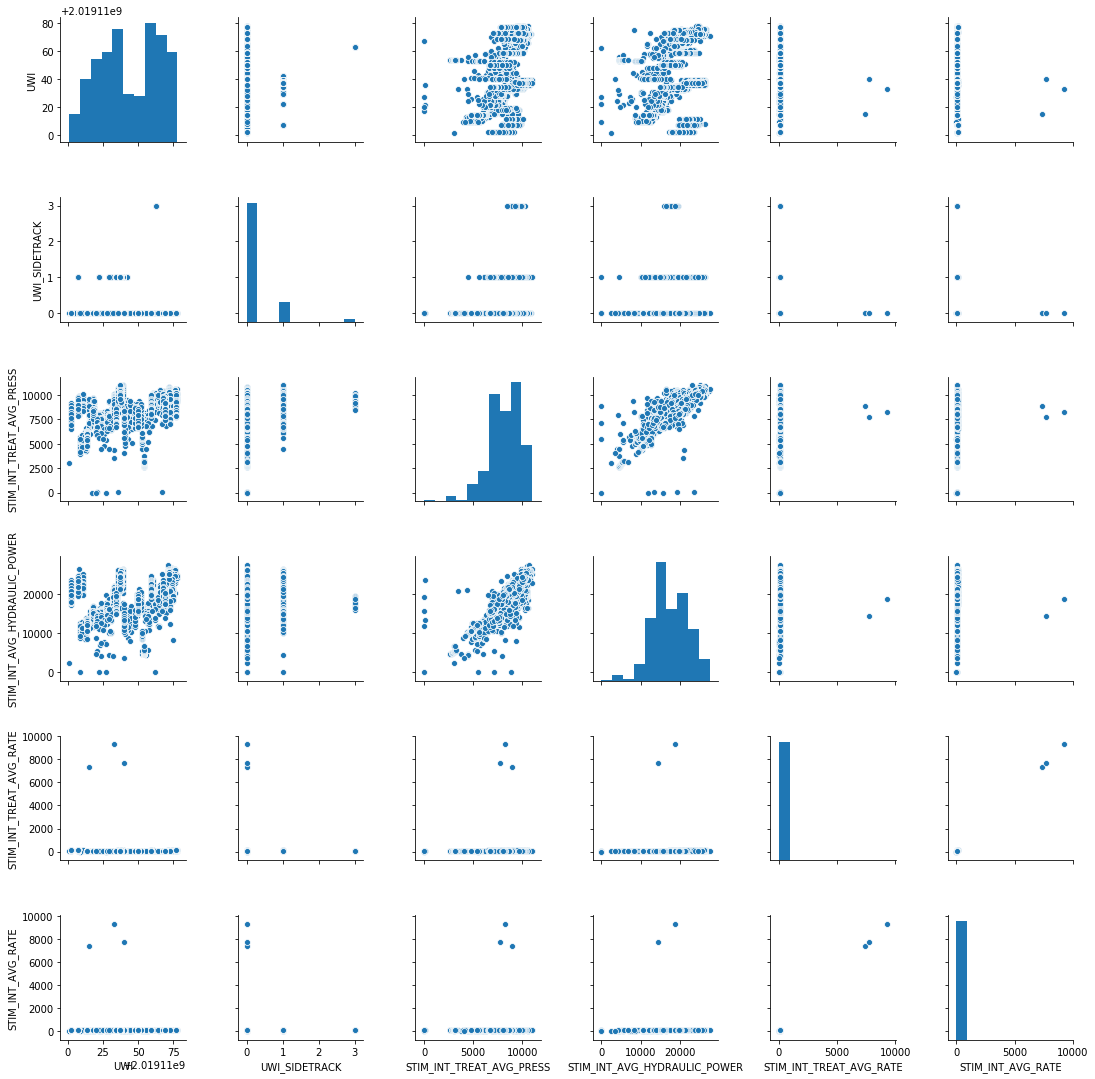

In [65]:
df1 = df5[avg_feature]
g = sns.pairplot(df1)

STIM_INT_AVG_HYDRALIC_POWER & STIM_INT_TREAT_AVG_PRESS have some correlation.
The hydralic power and press have a correlations in the max, min, avg etc.
Everything else is crappy

In [ ]:
for feature in avg_feature:
    for var in numeric_features:
        data=df5.copy()
        if var != feature:
            plt.scatter(data[var],data[feature])
            plt.xlabel(var)
            plt.ylabel(feature)
            plt.show()

In [ ]:
discrete_feature=[feature for feature in numeric_features if len(df5[feature].unique())>10 and feature not in avg_feature+['Id'] and len(df5[feature].unique())<1000 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
df5[discrete_feature].describe()


In [ ]:
for feature in discrete_feature:
    if feature!='STIM_INT_STAGE_NUMBER':
        data=df5.copy()
        data.groupby(feature)['STIM_INT_STAGE_NUMBER'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('STIM_INT_STAGE_NUMBER')
        plt.title(feature)
        plt.show()


In [ ]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+avg_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

Some nice stuff in here

In [ ]:
for feature in continuous_feature:
    data=df5.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()